# Unsupervised Machine Lerning - Clustering
Sumudu Tennakoon, PhD

To learn more about Python, refeer to the following websites

* Python : www.python.org
* W3Schools : www.w3schools.com/python

To learn more about the Python packages we explore in this notebook, refeer to the following websites

* NumPy : www.numpy.org
* Matplotlib : www.matplotlib.org
* Pandas : https://pandas.pydata.org
* Scikit-Learn : https://scikit-learn.org/
* Seaborn: https://seaborn.pydata.org/
* StatsModel : https://www.statsmodels.org

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer = np.arange(0,1000)
customer

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [4]:
sms = np.concatenate((np.random.normal(200, 100, 700), np.random.normal(600, 100, 300)))
minutes = np.concatenate((np.random.normal(500, 100, 700), np.random.normal(800, 100, 300)))
data = np.abs(np.concatenate((np.random.normal(20, 50, 700), np.random.normal(30, 15, 300))))

In [5]:
usage_data = pd.DataFrame(data={'customer':customer, 'sms':sms, 'minutes':minutes, 'data':data})
usage_data.head()

,customer,sms,minutes,data
0,0,140.611174,522.946510,1.024267
1,1,214.987402,693.540662,2.943152
2,2,117.439968,609.925916,50.383377
3,3,188.947014,529.420233,93.375974
4,4,91.907002,601.213342,20.282456


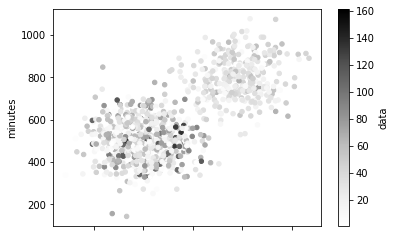

In [ ]:
usage_data.plot(kind='scatter', x='sms', y='minutes', c='data' )

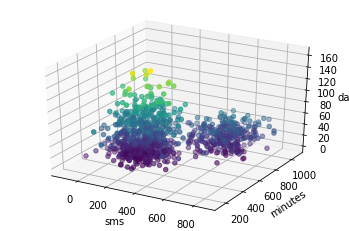

In [ ]:
fig = plt.figure().gca(projection='3d')
fig.scatter(usage_data['sms'], usage_data['minutes'], usage_data['data'], c=usage_data['data'])
fig.set_xlabel('sms')
fig.set_ylabel('minutes')
fig.set_zlabel('data')
plt.show()

# KMeans Clustering
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
from sklearn.cluster import KMeans

X = usage_data[['sms', 'minutes', 'data']]

model = KMeans(n_clusters=3, random_state=42)

model.fit(X)

y_pred = model.predict(X)

usage_data['cluster'] = y_pred

usage_data.head()

,customer,sms,minutes,data,cluster
0,0,198.807279,582.446155,116.796801,2
1,1,266.893835,490.433797,41.924693,2
2,2,289.536879,541.500897,105.042836,2
3,3,356.080113,387.760470,75.193066,2
4,4,495.301637,729.588113,64.155377,1


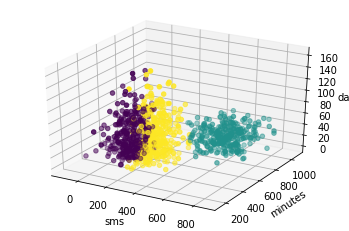

In [ ]:
fig = plt.figure().gca(projection='3d')
fig.scatter(usage_data['sms'], usage_data['minutes'], usage_data['data'], c=usage_data['cluster'])
fig.set_xlabel('sms')
fig.set_ylabel('minutes')
fig.set_zlabel('data')
plt.show()

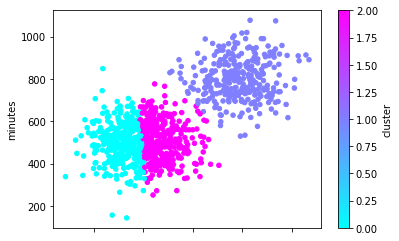

In [ ]:
# https://matplotlib.org/stable/gallery/color/colormap_reference.html
cmap = cm.get_cmap('cool') 

usage_data.plot(kind='scatter', x='sms', y='minutes', c='cluster', cmap=cmap )

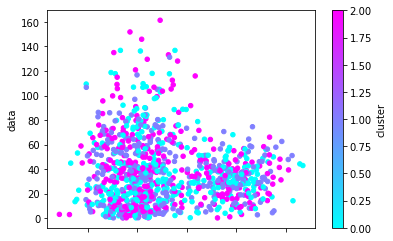

In [ ]:
usage_data.plot(kind='scatter', x='sms', y='data', c='cluster', cmap=cmap )

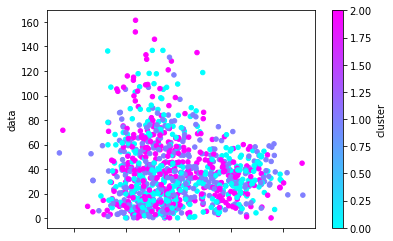

In [ ]:
usage_data.plot(kind='scatter', x='minutes', y='data', c='cluster', cmap=cmap )

,x1,x2,y
0,-6.313051,-7.397920,2
1,-5.395436,-6.281524,2
2,5.756533,2.125180,1
3,-3.427919,7.314597,0
4,-3.028380,6.008000,0


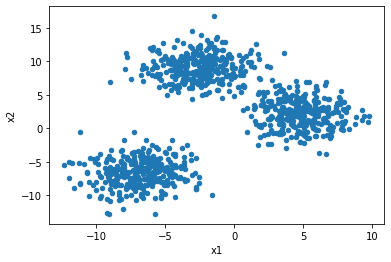

In [ ]:
# Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html

from sklearn.datasets import make_blobs

n_samples = 1000

X, y = make_blobs(n_samples=n_samples, n_features=2, centers=3, cluster_std=2, random_state=42)

data = pd.DataFrame(data=X, columns=['x1', 'x2'])
data['y'] = y

data.plot(kind='scatter', x='x1', y='x2', cmap=cmap )

data.head()

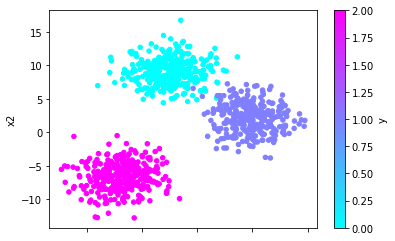

In [ ]:
cmap = cm.get_cmap('cool') 

data.plot(kind='scatter', x='x1', y='x2', c='y', cmap=cmap )

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x1,1000.0,-1.526079,5.188898,-12.286092,-5.798285,-2.466269,3.526041,9.760048
x2,1000.0,1.487945,6.735978,-12.760887,-5.360448,2.293888,7.636341,16.719749
y,1000.0,0.999000,0.817109,0.000000,0.000000,1.000000,2.000000,2.000000


In [ ]:
X = data[['x1', 'x2']]

model = KMeans(n_clusters=3, random_state=42)

model.fit(X)

y_pred = model.predict(X)

data['cluster'] = y_pred

data.head()

,x1,x2,y,cluster
0,-6.313051,-7.397920,2,1
1,-5.395436,-6.281524,2,1
2,5.756533,2.125180,1,0
3,-3.427919,7.314597,0,2
4,-3.028380,6.008000,0,2


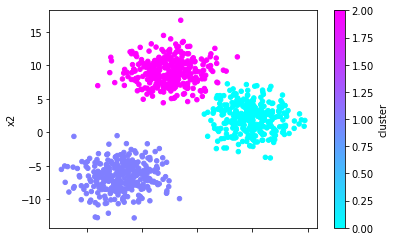

In [ ]:
cmap = cm.get_cmap('cool') 

data.plot(kind='scatter', x='x1', y='x2', c='cluster', cmap=cmap )

# Revisit Telecom Problem

,sms,minutes,data,y
0,1.180102,8.808669,4.940080,0
1,1.582422,4.289376,6.735459,1
2,1.662146,8.062379,6.133507,0
3,9.068554,9.404409,3.742236,2
4,5.197265,8.344126,6.447263,0


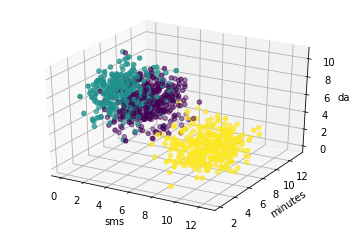

In [ ]:
from sklearn.datasets import make_blobs

n_samples = 1000

X, y = make_blobs(n_samples=n_samples, n_features=3, centers=3, cluster_std=1.5, random_state=42)

usage_data = pd.DataFrame(data=np.abs(X), columns=['sms', 'minutes', 'data'])
usage_data['y'] = y

fig = plt.figure().gca(projection='3d')
fig.scatter(usage_data['sms'], usage_data['minutes'], usage_data['data'], c=usage_data['y'])
fig.set_xlabel('sms')
fig.set_ylabel('minutes')
fig.set_zlabel('data')


usage_data.head()

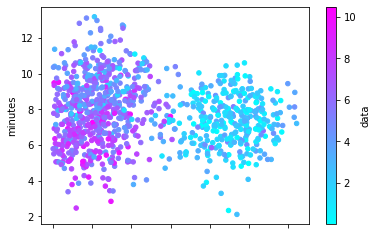

In [ ]:
usage_data.plot(kind='scatter', x='sms', y='minutes', c='data', cmap=cmap )

In [ ]:
# 

## Apply K-Means Clustering

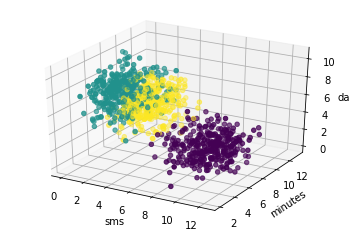

In [ ]:
X = usage_data[['sms', 'minutes', 'data']]

model = KMeans(n_clusters=3, random_state=42)
model.fit(X)

y_pred = model.predict(X)
usage_data['cluster'] = y_pred

fig = plt.figure().gca(projection='3d')
fig.scatter(usage_data['sms'], usage_data['minutes'], usage_data['data'], c=usage_data['cluster'])
fig.set_xlabel('sms')
fig.set_ylabel('minutes')
fig.set_zlabel('data')
plt.show()

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) Clustering
* Good for data which contains clusters of similar density.
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

,x1,x2,y
0,0.348721,-0.322203,2
1,0.494618,0.976274,0
2,-0.706045,-0.699887,1
3,-2.040514,-0.812233,1
4,0.753597,1.240520,0


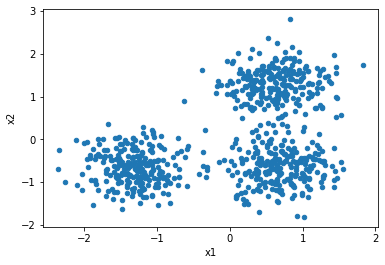

In [ ]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=42)
X = StandardScaler().fit_transform(X)

data = pd.DataFrame(data=X, columns=['x1', 'x2'])
data['y'] = y

data.plot(kind='scatter', x='x1', y='x2', cmap=cmap )

data.head()

Estimated number of clusters: 2
Estimated number of noise points: 18
Homogeneity: 0.003
Completeness: 0.005
V-measure: 0.004
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.001
Silhouette Coefficient: 0.448


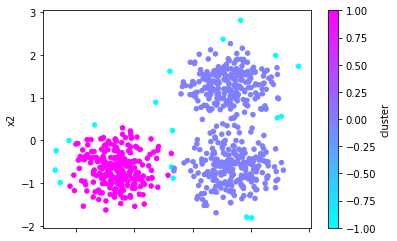

In [ ]:
from sklearn.cluster import DBSCAN

X = data[['x1', 'x2']]

model = DBSCAN(eps=0.3, min_samples=10)
model.fit(X)
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

labels = model.labels_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

cmap = cm.get_cmap('cool') 

data['cluster'] = labels
data.plot(kind='scatter', x='x1', y='x2', c='cluster', cmap=cmap )

Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


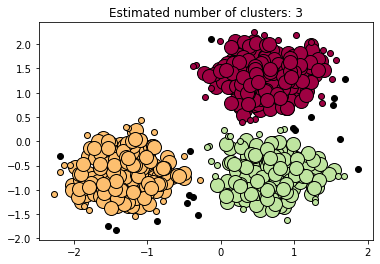

In [ ]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()